In [2]:
!pip install numpy as np 

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [3]:
import pandas as pd

def load_stock_data(file_path):
    try:
        df = pd.read_csv(file_path)

        # Since there's no 'Ticker' column, let's add it
        df['Ticker'] = 'AAPL'

        # Now any filter by 'Ticker' works
        return df
    except Exception as e:
        print("Error loading stock data:", e)
        return None


In [8]:
!pip install pandas_ta


2025-06-02 17:47:45,274 - INFO - Loaded stock data from C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/AAPL_historical_data.csv
2025-06-02 17:47:45,278 - ERROR - Error computing indicators: module 'talib' has no attribute 'sma'


2025-06-02 17:47:45,358 - ERROR - Error in visualization: 'SMA_20'
2025-06-02 17:47:45,365 - ERROR - Error summarizing indicators: "['SMA_20', 'SMA_50', 'EMA_20', 'RSI_14', 'MACD'] not in index"
2025-06-02 17:47:46,026 - INFO - Saved processed data to C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/processed_AAPL_data.csv


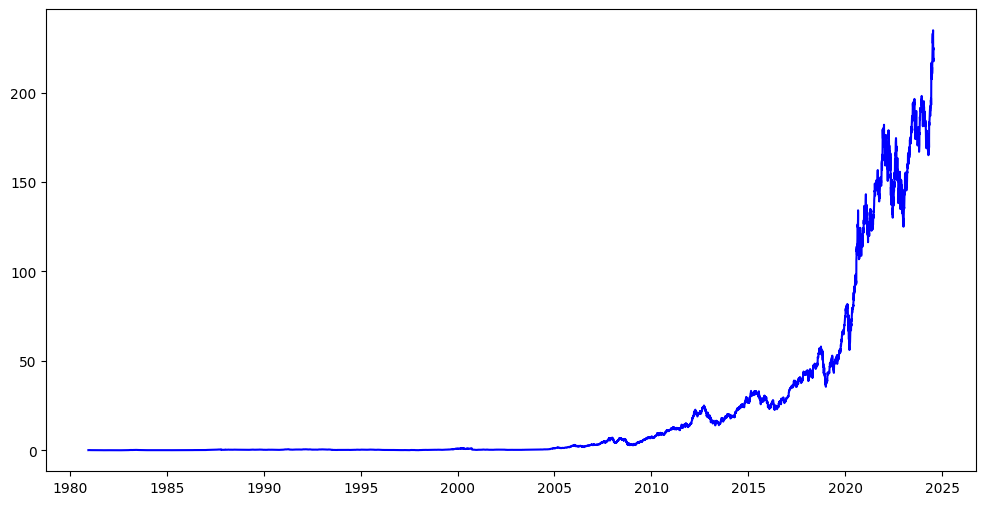

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib # ✅ correct import
import os
import logging
from datetime import datetime

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def load_stock_data(file_path):
    """Load stock price data from CSV file."""
    try:
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.sort_values('Date', inplace=True)
        df.reset_index(drop=True, inplace=True)
        df['Ticker'] = 'AAPL'  # Add ticker info manually
        logger.info(f"Loaded stock data from {file_path}")
        return df
    except Exception as e:
        logger.error(f"Error loading stock data: {e}")
        return None

def compute_indicators(df):
    """Compute technical indicators using pandas_ta."""
    try:
        # Moving Averages
        df['SMA_20'] = ta.sma(df['Close'], length=20)
        df['SMA_50'] = ta.sma(df['Close'], length=50)
        df['EMA_20'] = ta.ema(df['Close'], length=20)

        # RSI
        df['RSI_14'] = ta.rsi(df['Close'], length=14)

        # MACD
        macd = ta.macd(df['Close'])
        df['MACD'] = macd['MACD_12_26_9']
        df['MACD_Signal'] = macd['MACDs_12_26_9']
        df['MACD_Hist'] = macd['MACDh_12_26_9']

        # Buy/Sell Signals
        df['SMA_Crossover'] = np.where(df['SMA_20'] > df['SMA_50'], 1, -1)
        df['RSI_Signal'] = np.where(df['RSI_14'] > 70, -1, np.where(df['RSI_14'] < 30, 1, 0))

        logger.info("Computed technical indicators.")
        return df
    except Exception as e:
        logger.error(f"Error computing indicators: {e}")
        return df

def visualize_indicators(df, output_dir="plots/"):
    """Visualize stock prices, indicators, and signals."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    try:
        # Plot 1: Close Price with MAs
        plt.figure(figsize=(12, 6))
        plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
        plt.plot(df['Date'], df['SMA_20'], label='SMA 20', color='orange')
        plt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='green')
        plt.plot(df['Date'], df['EMA_20'], label='EMA 20', color='red')
        plt.title('AAPL Close Price and Moving Averages')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, 'AAPL_price_ma.png'))
        plt.close()

        # Plot 2: RSI
        plt.figure(figsize=(12, 4))
        plt.plot(df['Date'], df['RSI_14'], label='RSI 14', color='purple')
        plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
        plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
        plt.title('AAPL RSI')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, 'AAPL_rsi.png'))
        plt.close()

        # Plot 3: MACD
        plt.figure(figsize=(12, 4))
        plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
        plt.plot(df['Date'], df['MACD_Signal'], label='Signal', color='orange')
        plt.bar(df['Date'], df['MACD_Hist'], label='Histogram', color='grey', alpha=0.3)
        plt.title('AAPL MACD')
        plt.xlabel('Date')
        plt.ylabel('MACD')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, 'AAPL_macd.png'))
        plt.close()

        logger.info("Saved indicator plots.")
    except Exception as e:
        logger.error(f"Error in visualization: {e}")

def summarize_indicators(df):
    """Summarize the indicator columns."""
    try:
        summary = df[['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI_14', 'MACD']].describe()
        logger.info(f"Indicator Summary:\n{summary}")
        return summary
    except Exception as e:
        logger.error(f"Error summarizing indicators: {e}")
        return None

def main():
    """Main function for Task 2."""
    file_path = "C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/AAPL_historical_data.csv"
    df = load_stock_data(file_path)

    if df is not None and not df.empty:
        df = compute_indicators(df)
        visualize_indicators(df)
        summary = summarize_indicators(df)

        # Save processed data
        output_path = "C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/processed_AAPL_data.csv"
        df.to_csv(output_path, index=False)
        logger.info(f"Saved processed data to {output_path}")
    else:
        logger.error("No stock data available.")

if __name__ == "__main__":
    main()


In [13]:
!pip install vaderSentiment


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import logging
from datetime import datetime

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def load_data(news_path="C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/raw_analyst_ratings.csv",
              stock_path="C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/processed_AAPL_data.csv"):
    """Load news and stock data."""
    try:
        news_df = pd.read_csv(news_path)
        news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
        news_df = news_df.rename(columns={'date': 'Date', 'stock': 'Ticker'})
        # Remove timezone info if present
        news_df['Date'] = news_df['Date'].dt.tz_localize(None)
        
        stock_df = pd.read_csv(stock_path)
        stock_df['Date'] = pd.to_datetime(stock_df['Date'])
        # Remove timezone info if present
        stock_df['Date'] = stock_df['Date'].dt.tz_localize(None)
        
        logger.info("Loaded news and stock data")
        return news_df, stock_df
    except Exception as e:
        logger.error(f"Error loading data: {e}")
        return None, None

def compute_sentiment(news_df):
    """Compute sentiment scores for headlines using VADER."""
    try:
        analyzer = SentimentIntensityAnalyzer()
        news_df['Sentiment'] = news_df['headline'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
        logger.info("Computed sentiment scores")
        return news_df
    except Exception as e:
        logger.error(f"Error computing sentiment: {e}")
        return news_df

def align_data(news_df, stock_df, ticker):
    """Align news and stock data by date and ticker."""
    try:
        news_ticker = news_df[news_df['Ticker'] == ticker][['Date', 'Sentiment']].groupby('Date').mean().reset_index()
        stock_ticker = stock_df[stock_df['Ticker'] == ticker][['Date', 'Close']]
        merged_df = pd.merge(news_ticker, stock_ticker, on='Date', how='inner')
        # Compute daily returns
        merged_df['Returns'] = merged_df['Close'].pct_change()
        logger.info(f"Aligned data for {ticker}")
        return merged_df
    except Exception as e:
        logger.error(f"Error aligning data for {ticker}: {e}")
        return pd.DataFrame()

def compute_correlations(df, ticker, output_dir="plots/"):
    """Compute and visualize correlations between sentiment and returns."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    try:
        correlation = df['Sentiment'].corr(df['Returns'])
        logger.info(f"Correlation between sentiment and returns for {ticker}: {correlation:.4f}")
        
        # Scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='Sentiment', y='Returns', data=df, color='blue', alpha=0.5)
        plt.title(f'{ticker} Sentiment vs. Returns (Correlation: {correlation:.4f})')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Daily Returns')
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, f'{ticker}_sentiment_returns.png'))
        plt.close()
        
        return correlation
    except Exception as e:
        logger.error(f"Error computing correlations for {ticker}: {e}")
        return None

def main():
    """Main function for Task 3."""
    tickers = ['AAPL', 'MSFT', 'TSLA']  # Replace with your stocks
    news_df, stock_df = load_data()
    
    if news_df is not None and stock_df is not None:
        news_df = compute_sentiment(news_df)
        correlations = {}
        for ticker in tickers:
            aligned_df = align_data(news_df, stock_df, ticker)
            if not aligned_df.empty:
                correlation = compute_correlations(aligned_df, ticker)
                correlations[ticker] = correlation
                # Save aligned data
                output_path = f"C:\\Users\\HP\\10 Acadamy PRojects\\New folder (1)\\News-sentiment-price-prediction\\data\\aligned_{ticker}_data.csv"
                aligned_df.to_csv(output_path, index=False)
                logger.info(f"Saved aligned data for {ticker} to {output_path}")
        logger.info(f"Correlations: {correlations}")
    else:
        logger.error("Data loading failed.")

if __name__ == "__main__":
    main()


2025-06-02 17:57:28,992 - INFO - Loaded news and stock data
2025-06-02 17:58:57,253 - INFO - Computed sentiment scores
2025-06-02 17:58:57,355 - INFO - Aligned data for AAPL
2025-06-02 17:58:57,465 - INFO - Aligned data for MSFT
2025-06-02 17:58:57,575 - INFO - Aligned data for TSLA
2025-06-02 17:58:57,575 - INFO - Correlations: {}


In [26]:
import pynance as pn


In [27]:
import pandas as pd

df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/processed_AAPL_data.csv')

print(df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Ticker  
0        0.0           0.0   AAPL  
1        0.0           0.0   AAPL  
2        0.0           0.0   AAPL  
3        0.0           0.0   AAPL  
4        0.0           0.0   AAPL  


In [30]:
!pip install ta


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29497 sha256=9b172b5cf8efeac16951b938d2c57ec4527ad1d51ed0a568d20c0d984054def9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e3\3a\ee\4955a26c90a4b7deb6d725dc8ec7b8604a7aef44e43a2e8af7
Successfully built ta


# Financial Metrics/Indicators

In [32]:
import pandas as pd
import ta

# Load your CSV into stock_df (adjust the path)
stock_df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/processed_AAPL_data.csv')

# Calculate RSI (14-day window)
stock_df['RSI'] = ta.momentum.rsi(stock_df['Close'], window=14)

# Calculate 50-day SMA
stock_df['SMA_50'] = stock_df['Close'].rolling(window=50).mean()

# Calculate 200-day SMA
stock_df['SMA_200'] = stock_df['Close'].rolling(window=200).mean()

print(stock_df[['Close', 'RSI', 'SMA_50', 'SMA_200']].tail())


            Close        RSI      SMA_50    SMA_200
10993  218.539993  48.687742  208.474199  188.12235
10994  217.490005  47.386437  209.098399  188.32235
10995  217.960007  48.055700  209.709000  188.51720
10996  218.240005  48.476184  210.279400  188.71645
10997  218.800003  49.359115  210.858600  188.91145


# Visualize the Data with Matplotlib

2025-06-02 18:09:49,034 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-02 18:09:49,892 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-02 18:09:50,417 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-02 18:09:50,874 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-02 18:09:51,338 - INFO - Using categorical units to plot a list of strings that are all parsable as 

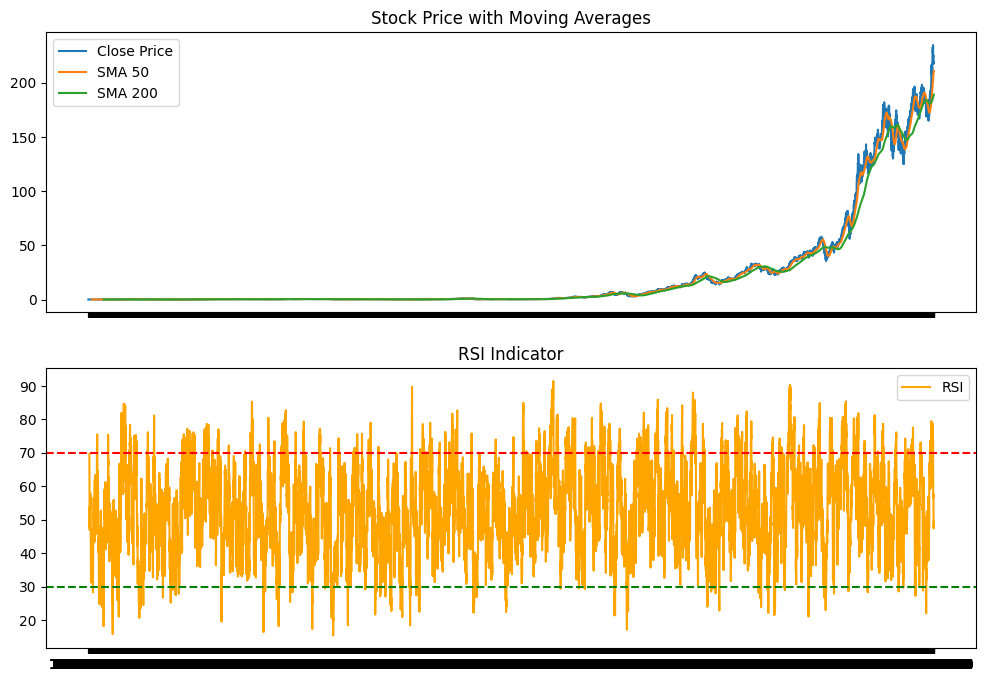

In [33]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))

# Price plot
ax1.plot(stock_df['Date'], stock_df['Close'], label='Close Price')
ax1.plot(stock_df['Date'], stock_df['SMA_50'], label='SMA 50')
ax1.plot(stock_df['Date'], stock_df['SMA_200'], label='SMA 200')
ax1.set_title('Stock Price with Moving Averages')
ax1.legend()

# RSI plot
ax2.plot(stock_df['Date'], stock_df['RSI'], label='RSI', color='orange')
ax2.axhline(70, color='red', linestyle='--')  # Overbought
ax2.axhline(30, color='green', linestyle='--')  # Oversold
ax2.set_title('RSI Indicator')
ax2.legend()

plt.show()


# Explore Correlations / Impact on Stock Price

In [34]:
stock_df['Returns'] = stock_df['Close'].pct_change()
correlation_rsi_returns = stock_df['RSI'].corr(stock_df['Returns'])
print(f"Correlation between RSI and Returns: {correlation_rsi_returns:.4f}")


Correlation between RSI and Returns: 0.3195


In [36]:
import ta

def add_indicators(stock_df):
    stock_df['RSI'] = ta.momentum.RSIIndicator(stock_df['Close'], window=14).rsi()
    stock_df['SMA_50'] = ta.trend.SMAIndicator(stock_df['Close'], window=50).sma_indicator()
    stock_df['SMA_200'] = ta.trend.SMAIndicator(stock_df['Close'], window=200).sma_indicator()
    stock_df['Returns'] = stock_df['Close'].pct_change()
    return stock_df


In [44]:
import pandas as pd
# Example: replace with your file paths
news_df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/raw_analyst_ratings.csv', parse_dates=['Date'])
stock_df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/processed_AAPL_data.csv', parse_dates=['Date'])


In [48]:
import pandas as pd

# Load CSV without parse_dates first
news_df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/raw_analyst_ratings.csv')
print(news_df.columns)

# Make sure the column name matches
date_col = 'Date'  # Change this if it’s different in your CSV

# Convert to datetime, ignoring errors
news_df[date_col] = pd.to_datetime(news_df[date_col], errors='coerce').dt.date

# Load stock data
stock_df = pd.read_csv('C:/Users/HP/10 Acadamy PRojects/New folder (1)/News-sentiment-price-prediction/data/processed_AAPL_data.csv')

# If needed, do the same for stock_df
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce').dt.date


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'Date', 'stock'], dtype='object')


In [49]:
news_df['Date'] = pd.to_datetime(news_df['Date']).dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date


In [53]:
from textblob import TextBlob

def compute_sentiment(news_df):
    # Create a new column for sentiment polarity
    news_df['Sentiment'] = news_df['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return news_df


In [57]:
from textblob import TextBlob

# Fill missing headlines with empty strings
news_df['headline'] = news_df['headline'].fillna("")

# Create Sentiment column
news_df['Sentiment'] = news_df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group by Date and calculate average sentiment
daily_sentiment = news_df.groupby('Date')['Sentiment'].mean().reset_index()


In [58]:
stock_df.sort_values('Date', inplace=True)
stock_df['Return'] = stock_df['Close'].pct_change()


In [59]:
merged_df = pd.merge(daily_sentiment, stock_df[['Date', 'Return']], on='Date', how='inner')


In [60]:
correlation = merged_df['Sentiment'].corr(merged_df['Return'])
print(f"Correlation between sentiment and stock returns: {correlation}")


Correlation between sentiment and stock returns: -0.007944202569266102


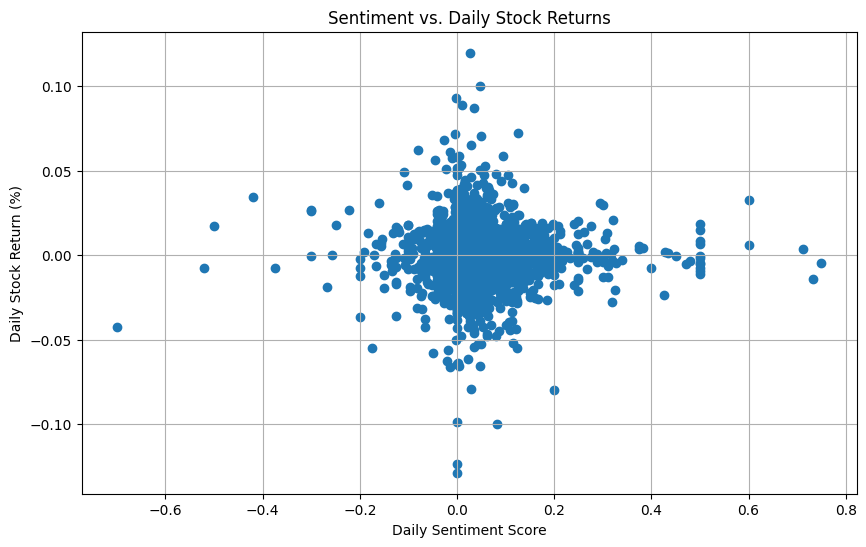

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Sentiment'], merged_df['Return'])
plt.title('Sentiment vs. Daily Stock Returns')
plt.xlabel('Daily Sentiment Score')
plt.ylabel('Daily Stock Return (%)')
plt.grid(True)
plt.show()
